In [17]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)
df_boston = boston.frame

df_sample = df_boston.sample(n=300, random_state=4713)
print(df_sample.head())

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE      DIS RAD    TAX  \
465  3.16360   0.0  18.10    0  0.655  5.759  48.2   3.0665  24  666.0   
354  0.04301  80.0   1.91    0  0.413  5.663  21.9  10.5857   4  334.0   
318  0.40202   0.0   9.90    0  0.544  6.382  67.2   3.5325   4  304.0   
336  0.03427   0.0   5.19    0  0.515  5.869  46.3   5.2311   5  224.0   
190  0.09068  45.0   3.44    0  0.437  6.951  21.5   6.4798   5  398.0   

     PTRATIO       B  LSTAT  MEDV  
465     20.2  334.40  14.13  19.9  
354     22.0  382.80   8.05  18.2  
318     18.4  395.21  10.36  23.1  
336     20.2  396.90   9.80  19.5  
190     15.2  377.68   5.10  37.0  


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Estadísticas descriptivas:")
print(df_sample.describe(include="all"))

Estadísticas descriptivas:
              CRIM          ZN       INDUS CHAS         NOX          RM  \
count   300.000000  300.000000  300.000000  300  300.000000  300.000000   
unique         NaN         NaN         NaN    2         NaN         NaN   
top            NaN         NaN         NaN    0         NaN         NaN   
freq           NaN         NaN         NaN  284         NaN         NaN   
mean      3.957158   12.793333   11.028267  NaN    0.552939    6.294220   
std       9.593497   25.726773    6.935544  NaN    0.116561    0.666548   
min       0.009060    0.000000    0.460000  NaN    0.385000    3.863000   
25%       0.069943    0.000000    5.130000  NaN    0.448000    5.919250   
50%       0.266005    0.000000    8.560000  NaN    0.532000    6.211000   
75%       4.253990   14.375000   18.100000  NaN    0.624000    6.604500   
max      88.976200  100.000000   27.740000  NaN    0.871000    8.780000   

               AGE         DIS  RAD         TAX     PTRATIO           B 

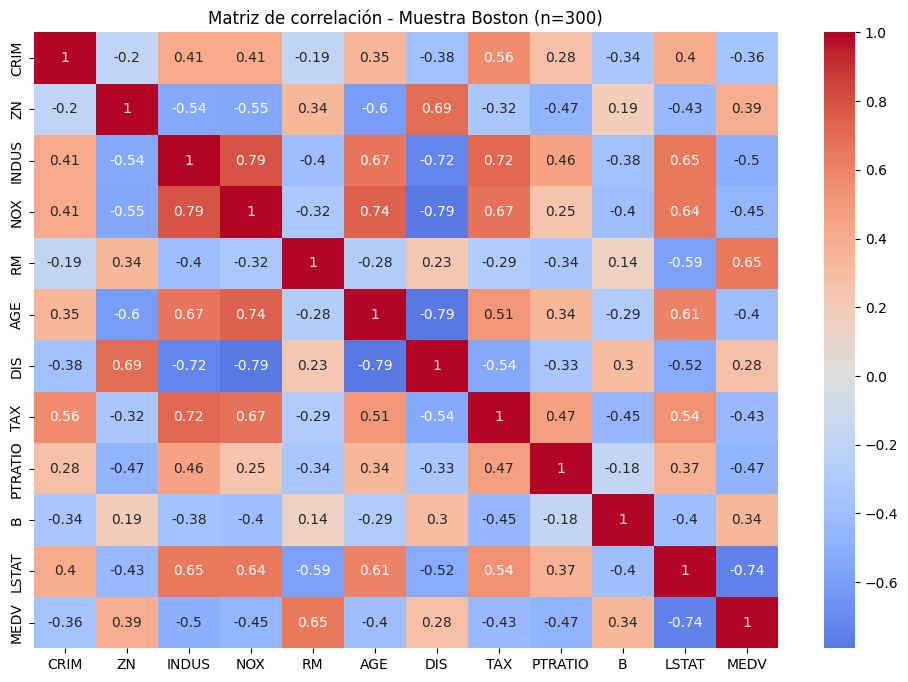


Correlaciones con MEDV:
MEDV       1.000000
RM         0.645617
ZN         0.392413
B          0.335640
DIS        0.280002
CRIM      -0.362138
AGE       -0.399469
TAX       -0.433519
NOX       -0.453835
PTRATIO   -0.469049
INDUS     -0.495882
LSTAT     -0.742944
Name: MEDV, dtype: float64


In [19]:
corr = df_sample.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True)
plt.title("Matriz de correlación - Muestra Boston (n=300)")
plt.show()

# Variables más correlacionadas con MEDV
print("\nCorrelaciones con MEDV:")
print(corr['MEDV'].sort_values(ascending=False))

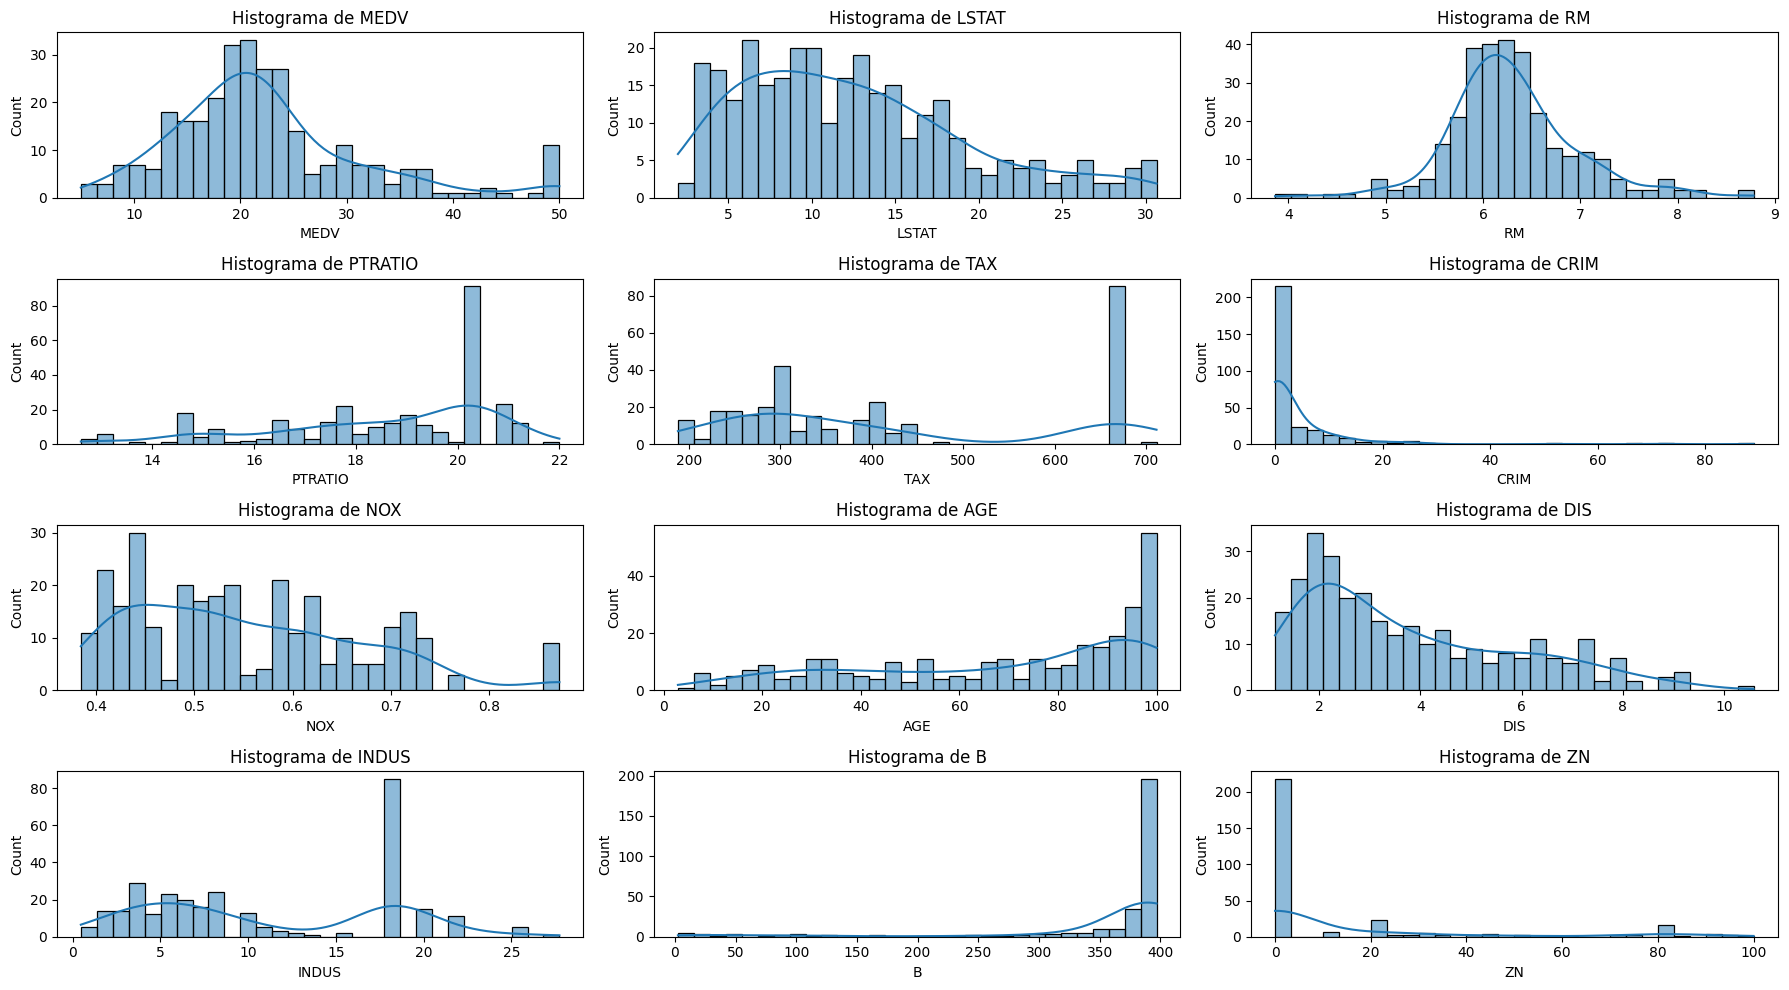

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_plot = ['MEDV','LSTAT','RM','PTRATIO','TAX','CRIM', 'NOX', 'AGE', 'DIS', 'INDUS','B', 'ZN']
n = len(cols_plot)
fig, axes = plt.subplots(4, 3, figsize=(18, 10))  # 4 filas, 3 columnas

for i, c in enumerate(cols_plot):
    if c in df_sample.columns:
        ax = axes[i // 3, i % 3]
        sns.histplot(df_sample[c], bins=30, kde=True, ax=ax)
        ax.set_title(f"Histograma de {c}")

plt.tight_layout()
plt.show()

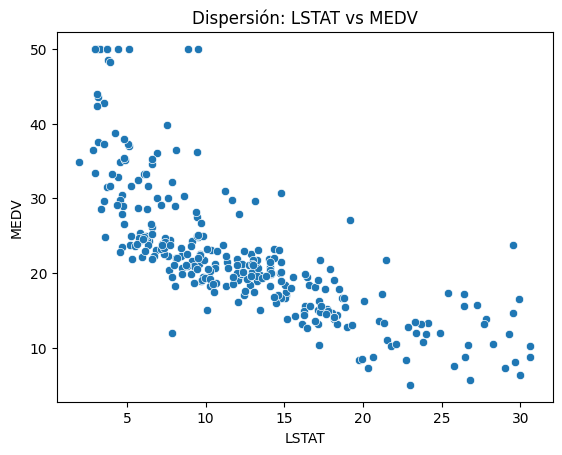

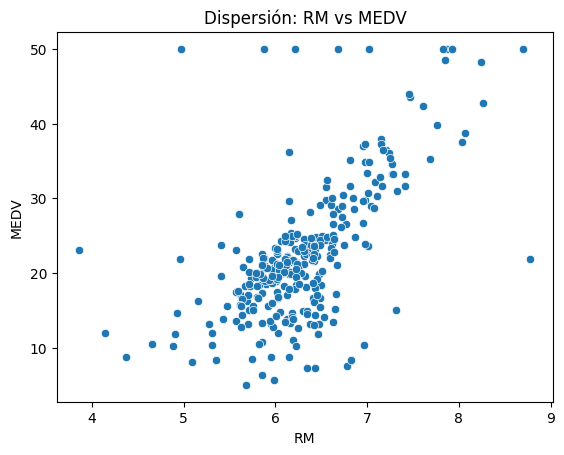

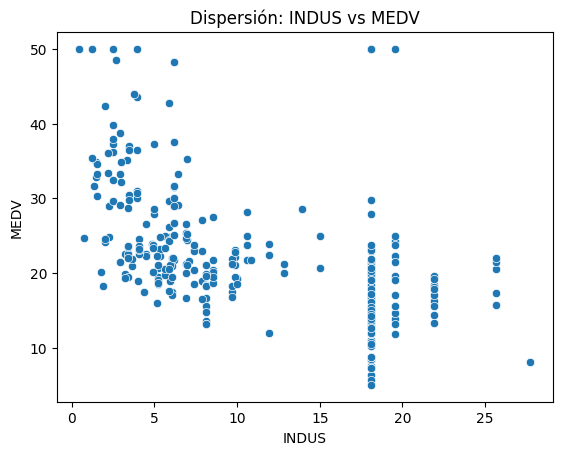

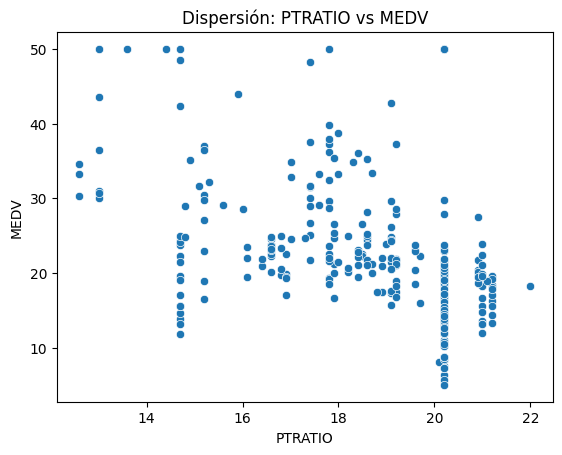

In [21]:
top_corr = corr['MEDV'].drop('MEDV').abs().sort_values(ascending=False).head(4).index
for c in top_corr:
    plt.figure()
    sns.scatterplot(x=df_sample[c], y=df_sample['MEDV'])
    plt.xlabel(c); plt.ylabel('MEDV')
    plt.title(f"Dispersión: {c} vs MEDV")
    plt.show()

In [22]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats import diagnostic as diag
import scipy.stats as stats
import matplotlib.pyplot as plt

y = df_sample['MEDV'].values
X = df_sample.drop(columns=['MEDV'])
X = sm.add_constant(X, has_constant='add')  # intercepto

In [23]:
#import numpy as np
import pandas as pd
import statsmodels.api as sm

# 1) Normaliza el nombre de la variable objetivo (MEDV o medv)
target_col = 'MEDV' if 'MEDV' in df_sample.columns else 'medv'

# 2) Asegura que TODO sea numérico y sin NaN
df_num = df_sample.copy()

# Convierte todo a numérico; si hay strings los vuelve NaN
for c in df_num.columns:
    df_num[c] = pd.to_numeric(df_num[c], errors='coerce')

# Elimina filas con NaN (puedes reportar cuántas se fueron)
before = len(df_num)
df_num = df_num.dropna(axis=0).reset_index(drop=True)
print(f"Filas eliminadas por NaN: {before - len(df_num)}")

# 3) Separa X, y (solo columnas numéricas)
y = df_num[target_col].astype(float).values
X = df_num.drop(columns=[target_col]).select_dtypes(include=['number']).astype(float)

# 4) Agrega intercepto
X = sm.add_constant(X, has_constant='add')

# 5) Ajusta GLM Gaussiano
glm_gauss = sm.GLM(y, X, family=sm.families.Gaussian())
res = glm_gauss.fit()
print(res.summary())


Filas eliminadas por NaN: 0
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  300
Model:                            GLM   Df Residuals:                      286
Model Family:                Gaussian   Df Model:                           13
Link Function:               Identity   Scale:                          24.207
Method:                          IRLS   Log-Likelihood:                -896.51
Date:                Thu, 04 Sep 2025   Deviance:                       6923.2
Time:                        22:04:18   Pearson chi2:                 6.92e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9171
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6593   

In [24]:
glm_gauss = sm.GLM(y, X, family=sm.families.Gaussian())
res = glm_gauss.fit()

print(res.summary())  # tabla con coeficientes y p-valores

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  300
Model:                            GLM   Df Residuals:                      286
Model Family:                Gaussian   Df Model:                           13
Link Function:               Identity   Scale:                          24.207
Method:                          IRLS   Log-Likelihood:                -896.51
Date:                Thu, 04 Sep 2025   Deviance:                       6923.2
Time:                        22:04:18   Pearson chi2:                 6.92e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9171
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6593      7.041      6.485      0.0

In [25]:
summary_df = res.summary2().tables[1].copy()
sig = summary_df[summary_df['P>|z|'] < 0.05]
print("Variables significativas (p<0.05):")
display(sig[['Coef.', 'Std.Err.', 'P>|z|']])


Variables significativas (p<0.05):


,Coef.,Std.Err.,P>|z|
const,45.659286,7.040684,8.869402e-11
CRIM,-0.127005,0.037987,8.276050e-04
ZN,0.062159,0.017697,4.441239e-04
CHAS,3.939199,1.327671,3.007223e-03
NOX,-18.714207,5.492671,6.565139e-04
RM,2.878902,0.571048,4.620404e-07
DIS,-1.773230,0.293971,1.619457e-09
RAD,0.348585,0.097545,3.521316e-04
TAX,-0.013640,0.005483,1.285251e-02
PTRATIO,-0.922114,0.179533,2.803950e-07


In [26]:
ols = sm.OLS(res.model.endog, res.model.exog).fit()
print("\nR²:", round(ols.rsquared, 4))
print("R² ajustado:", round(ols.rsquared_adj, 4))



R²: 0.7231
R² ajustado: 0.7105


In [27]:
residuals = res.resid_response
fitted    = res.fittedvalues

Text(0.5, 1.0, 'Q-Q plot de residuales')

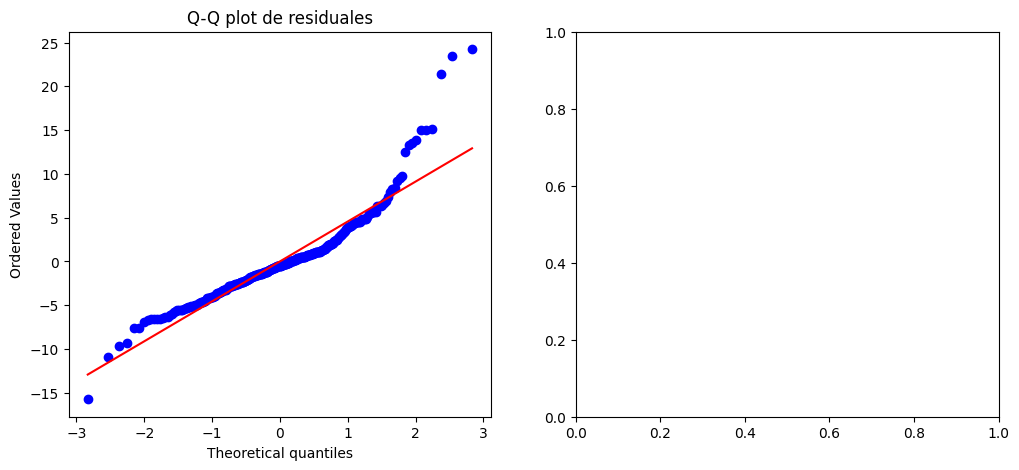

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
stats.probplot(residuals, dist="norm", plot=ax1)
ax1.set_title("Q-Q plot de residuales")

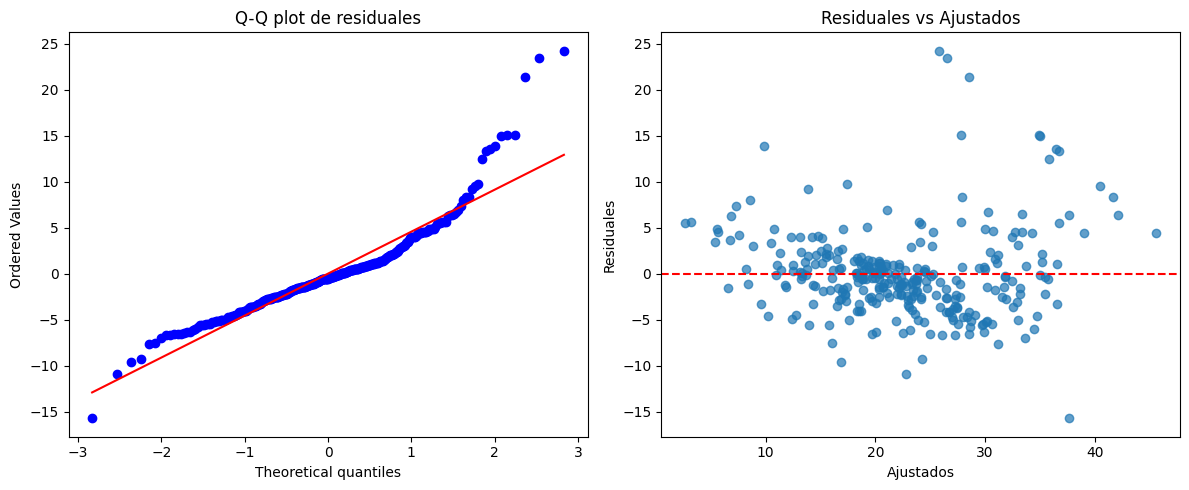

In [29]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
stats.probplot(residuals, dist="norm", plot=ax1)
ax1.set_title("Q-Q plot de residuales")

ax2.scatter(fitted, residuals, alpha=0.7)
ax2.axhline(0, color='red', linestyle='--')
ax2.set_xlabel("Ajustados")
ax2.set_ylabel("Residuales")
ax2.set_title("Residuales vs Ajustados")
plt.tight_layout()
plt.show()

In [30]:
bp_lm, bp_lm_p, bp_f, bp_f_p = diag.het_breuschpagan(residuals, res.model.exog)
print(f"\nBreusch–Pagan: LM p-value={bp_lm_p:.4f} | F p-value={bp_f_p:.4f}  (p>0.05 sugiere homocedasticidad)")


Breusch–Pagan: LM p-value=0.0000 | F p-value=0.0000  (p>0.05 sugiere homocedasticidad)


In [31]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(residuals)
print(f"Durbin-Watson: {dw:.3f} (≈2 sugiere no autocorrelación)")

Durbin-Watson: 1.985 (≈2 sugiere no autocorrelación)


In [32]:
X_for_vif = pd.DataFrame(res.model.exog, columns=res.model.exog_names)  # incluye const
vif = pd.DataFrame({
    "Variable": X_for_vif.columns,
    "VIF": [variance_inflation_factor(X_for_vif.values, i) for i in range(X_for_vif.shape[1])]
})
print("\nVIF (multicolinealidad):")
display(vif)


VIF (multicolinealidad):


,Variable,VIF
0,const,614.339390
1,CRIM,1.640402
2,ZN,2.560414
3,INDUS,4.188761
4,CHAS,1.102950
5,NOX,5.062919
6,RM,1.789519
7,AGE,3.345192
8,DIS,4.724410
9,RAD,9.488396
